In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

### Reading and Understanding of data

In [294]:
# loading the dataset
df_train = pd.read_csv('./data/train.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
# checking the data types and info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [296]:
# shape of the data frame
df_train.shape

(891, 12)

In [297]:
# missing value percentage
round(100 * (df_train.isna().sum(axis=0)/len(df_train.index)),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

As we can see that 77% of the data is missing for column 'Cabin'. So we are going to drop 'Cabin' column

In [298]:
# dropping the cabin column as 77% of the data are missing
df_train.drop(columns = ['Cabin'],inplace = True)

In [299]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [300]:
# converting the data type of the columns
df_train['Survived'] = df_train['Survived'].astype('category')
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

In [301]:
# printing the list of numerical and non-numerical columns
numerical_columns = df_train.select_dtypes(include = 'number').columns.tolist()
print("Numerical Columns")
print(numerical_columns,end="\n")
categorical_columns = df_train.select_dtypes(exclude = 'number').columns.tolist()
print("Categorical Columns")
print(categorical_columns,end="\n")

Numerical Columns
['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns
['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']


In [302]:
# check for duplicate records
any(df_train.duplicated(keep='first'))

False

There are no duplicate rows

In [303]:
# imputing the age with mean values
df_train.Age.fillna(df_train.Age.mean(),inplace = True)

In [304]:
# creating 'Age Groups' category column from Age column
def age_group(x):
    if (x > 0) and (x <=2):
        return 'babies'
    elif (x > 2) and (x <=16):
        return 'children'
    elif (x > 16) and (x <=30):
        return 'yound adults'
    elif (x > 30) and (x <=45):
        return 'middle-aged adults'
    elif (x > 45) and (x <=80):
        return 'old'
    else:
        return 'unknown'

df_train['Age Groups'] = df_train['Age'].apply(age_group)

### Visualisation of the data

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


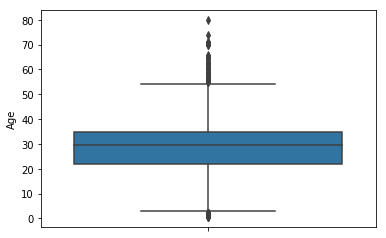

In [305]:
# plotting the passengers age
print(df_train['Age'].describe())
sns.boxplot(y = df_train['Age'])

we can see from the graph that, age of the passengers vary from 0.42 to 80 years, median age is 28 years and average age is 29 years

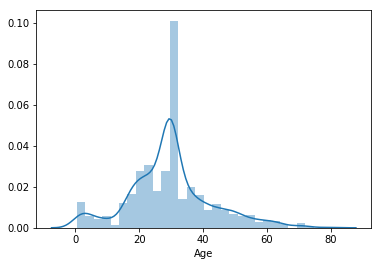

In [306]:
# plotting the histogram to see the distribution
sns.distplot(df_train['Age'].dropna())
plt.show()

We can clearly see that age of the passengers are normally distributed

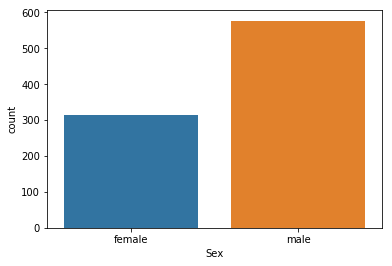

In [307]:
# plotting count plot to know the number of male and female
sns.countplot(df_train['Sex'])
plt.show()

As we can see there are more male passengers in the ship than the female passengers

In [308]:
# filtering only survived passengers in the dataset
df_survived = df_train[df_train['Survived']==1]

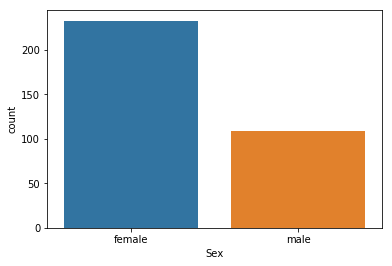

In [309]:
# plotting count plot to know the number of male and female in the survived passengers
sns.countplot(df_survived['Sex'])
plt.show()

As we can see, more female passengers are survived than the male passengers

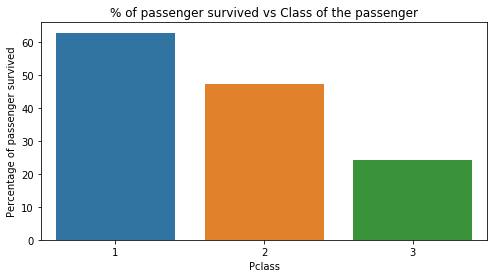

In [310]:
df_train['Survived'] = df_train['Survived'].astype(int)
by_pclass_segment_group = df_train.pivot_table(values='Survived',index='Pclass',aggfunc='mean')
by_pclass_segment_group.reset_index(inplace=True)
by_pclass_segment_group['Survived'] = 100*by_pclass_segment_group['Survived']
plt.figure(figsize=(8,4))
sns.barplot(x='Pclass',y='Survived', data=by_pclass_segment_group)
plt.xlabel("Pclass")
plt.ylabel("Percentage of passenger survived")
plt.title("% of passenger survived vs Class of the passenger")
plt.show()

Clearly, percentage of passengers belonged to class '1' survived more than the passsenger belonged to class '3' 

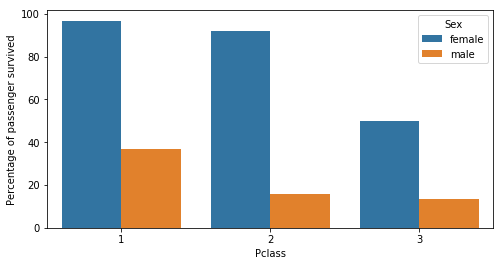

In [311]:
by_gender_pclass_segment_group = df_train.pivot_table(values='Survived',index=['Sex','Pclass'])
by_gender_pclass_segment_group.reset_index(inplace=True)
by_gender_pclass_segment_group['Survived'] = 100*by_gender_pclass_segment_group['Survived']
plt.figure(figsize=(8,4))
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=by_gender_pclass_segment_group)
plt.xlabel("Pclass")
plt.ylabel("Percentage of passenger survived")
plt.show()

From the above graph, we can clearly see that most of the male passengers survived belongs to Class '1'. Also, more female passengers belonged to the Class 1 and Class 2 are survived compare to the Class '3

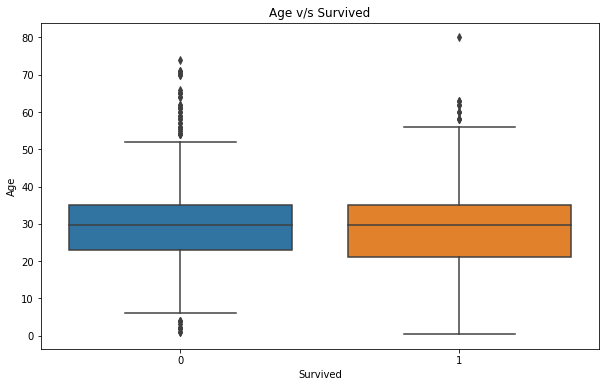

In [312]:
# bin by age group and analyse which age group survived
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Survived', y = 'Age', data = df_train)
plt.title("Age v/s Survived")
plt.show()

Median age of the passengers who are survived and who are dead is same but the upper quartile range of the passenger who are not survived is more than that of survived

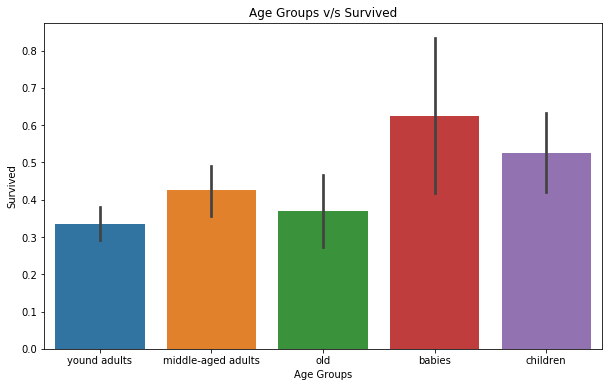

In [313]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Survived', x = 'Age Groups', data = df_train)
plt.title("Age Groups v/s Survived")
plt.show()

It can clearly seen from the graph that, babies are survived more compare to any other age group

### Model Prediction on the train data set using Logistic regression

In [314]:
# treating categorical variables
df_train.Sex = df_train.Sex.apply(lambda x : 0 if x == 'male' else 1)
# adding parents and siblings data to get family members data
df_train['Family Members'] = df_train.SibSp + df_train.Parch

#creating dummy variables for passenger class, age groups and embarked variables
pClass = pd.get_dummies(df_train.Pclass, drop_first = True)
embarked = pd.get_dummies(df_train.Embarked, drop_first = True)
age_groups = pd.get_dummies(df_train['Age Groups'], drop_first = True)

df_train = pd.concat([df_train,age_groups,pClass,embarked], axis=1)

In [315]:
# creating X and y training variables
y_train = df_train.pop('Survived')
X_train = df_train.drop(columns = ['PassengerId','Pclass','Name','Ticket','Embarked','Age Groups'])

In [316]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Family Members,children,middle-aged adults,old,yound adults,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,0,1,0,1


In [317]:
# feature scaling of numeric variables
scaler = MinMaxScaler()
cols_to_scale = ['Age','Fare','SibSp','Parch','Family Members']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [318]:
# defining logistic regression model and fitting the model with training data set
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [319]:
# predicting the result
y_train_pred = lr.predict(X_train)

In [320]:
# using confusion matrix to find the accuracy
confusion_matrix(y_train,result)

array([[480,  69],
       [104, 238]], dtype=int64)

In [321]:
round(100* ((480 + 238) / (480+69+104+238)),2)

80.58

We got 80% accuracy from the training set

### Model prediction on the test dataset

In [322]:
# now reading the test dataset
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [323]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [324]:
# dropping 'cabin' column
df_test.drop(columns = 'Cabin',inplace = True)

In [325]:
# imputting the age and fare values with its mean
df_test.Age.fillna(df_test.Age.mean(),inplace = True)
df_test.Fare.fillna(df_test.Fare.mean(),inplace = True)

In [326]:
# creating the age groups column
df_test['Age Groups'] = df_test['Age'].apply(age_group)

In [327]:
#creating dummy variables for categorical columns
df_test.Sex = df_test.Sex.apply(lambda x : 0 if x == 'male' else 1)
df_test['Family Members'] = df_test.SibSp + df_test.Parch

pClass = pd.get_dummies(df_test.Pclass, drop_first = True)

embarked = pd.get_dummies(df_test.Embarked, drop_first = True)

age_groups = pd.get_dummies(df_test['Age Groups'], drop_first = True)
df_test = pd.concat([df_test,pClass,age_groups,embarked], axis=1)

In [328]:
# creating X test variable
X_test = df_test.drop(columns = ['PassengerId','Pclass','Name','Ticket','Embarked','Age Groups'])

In [329]:
# feature scaling the numerical columns
cols_to_scale = ['Age','Fare','SibSp','Parch','Family Members']
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [330]:
# predicting the test result
y_test_pred = lr.predict(X_test)

In [331]:
#creating the gender submission csv file for submission to kaggle
gender_submission_df = pd.concat([df_test['PassengerId'],pd.Series(y_test_pred)],axis=1)
gender_submission_df.rename(columns={0:'Survived'},inplace = True)
gender_submission_df.to_csv("gender_submissions.csv",index = False)